# Exploring the claimant reliability dataset

In [63]:
# import requirements

import os
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable

In [64]:
# code for loading the dataset

from util import gather_dataset

# load the dataset using custom function
df = gather_dataset('./data/claimant_data/')

df.head()

,worker_id,task_id,task_response_id,file_id,sentence,tokens_id,publisher,source,reliability,Optional Comments:,batch_no,score
0,23QWQCPZ7PNP,f79dff90-7723-4c33-9582-33e46ab6176c,15d3b8d0-d17f-49b2-bb2f-c113957cddf7,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5
1,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3
2,9R3XRNAAW7RR,f040bde3-4c11-482c-b7e3-4bd080b1a7f7,2c7856c7-0bc6-4f40-9781-37b6942a2e36,PublicHealth-org_20170623T200727.conll.annot,14,1 2,PublicHealth.org,The article,5 - The source is fully reliable,NaN,1,5
3,MWHG9Y6DNGR9,f79dff90-7723-4c33-9582-33e46ab6176c,e2b709b8-16f3-4bc4-b513-8c2f28f0f1e1,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5
4,D7HVJTEKMYNW,e3f62e34-fb40-4bda-a5b4-acd3d72c1160,f16d6d05-ab57-4117-85b5-8c87fcd5a689,National-Vaccine-Information-Center-(NVIC)_201...,26,5 6,National Vaccine Information Center (NVIC),Dr. Cherry,5 - The source is fully reliable,NaN,1,5


In [107]:
# wrapper for printing results of functions

def print_formatting(func: Callable) -> Callable:
    """Decorator for printing formatting around the function prints"""

    def wrapper(*args, **kwargs):
        padd = '-'
        print(f'{" "+func.__name__+"() ":{padd}^80}')
        docstring = f'"""{func.__doc__}"""'
        print(f'{docstring:^80}\n')
        func(*args, **kwargs)
        print('-' * 80 + '\n')

    return wrapper


In [67]:
@print_formatting
def find_pilot_duplicates(pilot_path: str) -> None:
    """Test if there are duplicates of the text in the pilot in the other batches"""

    pilot_df = pd.read_csv(pilot_path)

    main_df = pd.DataFrame()
    data_path = '/'.join(pilot_path.split('/')[:-1]) + '/'
    for file in os.listdir(data_path):
        if file.endswith('.csv') and not file.endswith('b1.csv'):
            main_df = pd.concat([main_df, pd.read_csv(os.path.join(data_path, file))])


    overlap = pd.merge(pilot_df, main_df, how='inner', on=['publisher','sentence', 'tokens_id'])

    if overlap.empty:
        print('No duplicates found')
    else:
        print('Duplicates found:')
        print(overlap.to_string())
    
find_pilot_duplicates('./data/claimant_data/aggregated/Rating the Reliability of Sources and Publishers - b1.csv')

--------------------------- find_pilot_duplicates() ----------------------------
"""Test if there are duplicates of the text in the pilot in the other batches"""

No duplicates found
--------------------------------------------------------------------------------



## Basic Overview

---------------------- reliability_scores_distribution() -----------------------
     """Prints the distribution of the (reliability) scores in a column"""      

score
0     360
1    2487
2    3306
3    5311
4    3266
5    2570
Name: count, dtype: int64
--------------------------------------------------------------------------------



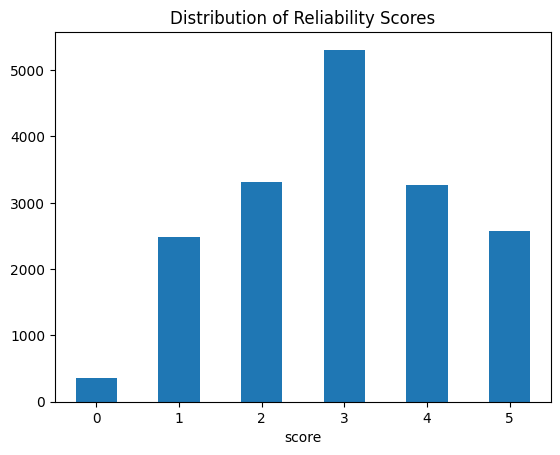

In [127]:
@print_formatting
def reliability_scores_distribution(column: pd.Series) -> None:
    """Prints the distribution of the (reliability) scores in a column"""

    print(column.value_counts().sort_index())

    # df.hist(column='z_score', bins=10, grid=False)
    column.value_counts().sort_index().plot(kind='bar', title='Distribution of Reliability Scores', rot=True)

reliability_scores_distribution(df['score'])

In [150]:
# count how many workers participated in the task

@print_formatting
def count_unique(df: pd.DataFrame, colname: str) -> None:
    """Prints the number of unique values in a column"""

    print(f'{len(df[colname].unique())} different {colname.split("_")[0]}s participated in the task.')

count_unique(df, 'worker_id')

-------------------------------- count_unique() --------------------------------
              """Prints the number of unique values in a column"""              

107 different workers participated in the task.
--------------------------------------------------------------------------------



In [151]:
# count how many unique publishers there are in the dataset
count_unique(df, 'publisher')

-------------------------------- count_unique() --------------------------------
              """Prints the number of unique values in a column"""              

146 different publishers participated in the task.
--------------------------------------------------------------------------------



---------------------- reliability_scores_per_publisher() ----------------------
               """Prints the reliability scores per publisher"""                

There are 146 unique publishers in the dataset.

The mean reliability score per publisher is:

21st Century Wire                                          2.544828
@berkeleywellness                                          2.539683
ABC News                                                   4.000000
AGE OF AUTISM                                              2.000000
Activist Post                                              2.235294
Ars Technica                                               3.196429
Atlas Monitor                                              2.285714
BBC News                                                   3.750000
Backyard Secret Exposed                                    2.300752
Banning-Beaumont CA Patch                                  3.944853
CIDRAP                                                     3.1

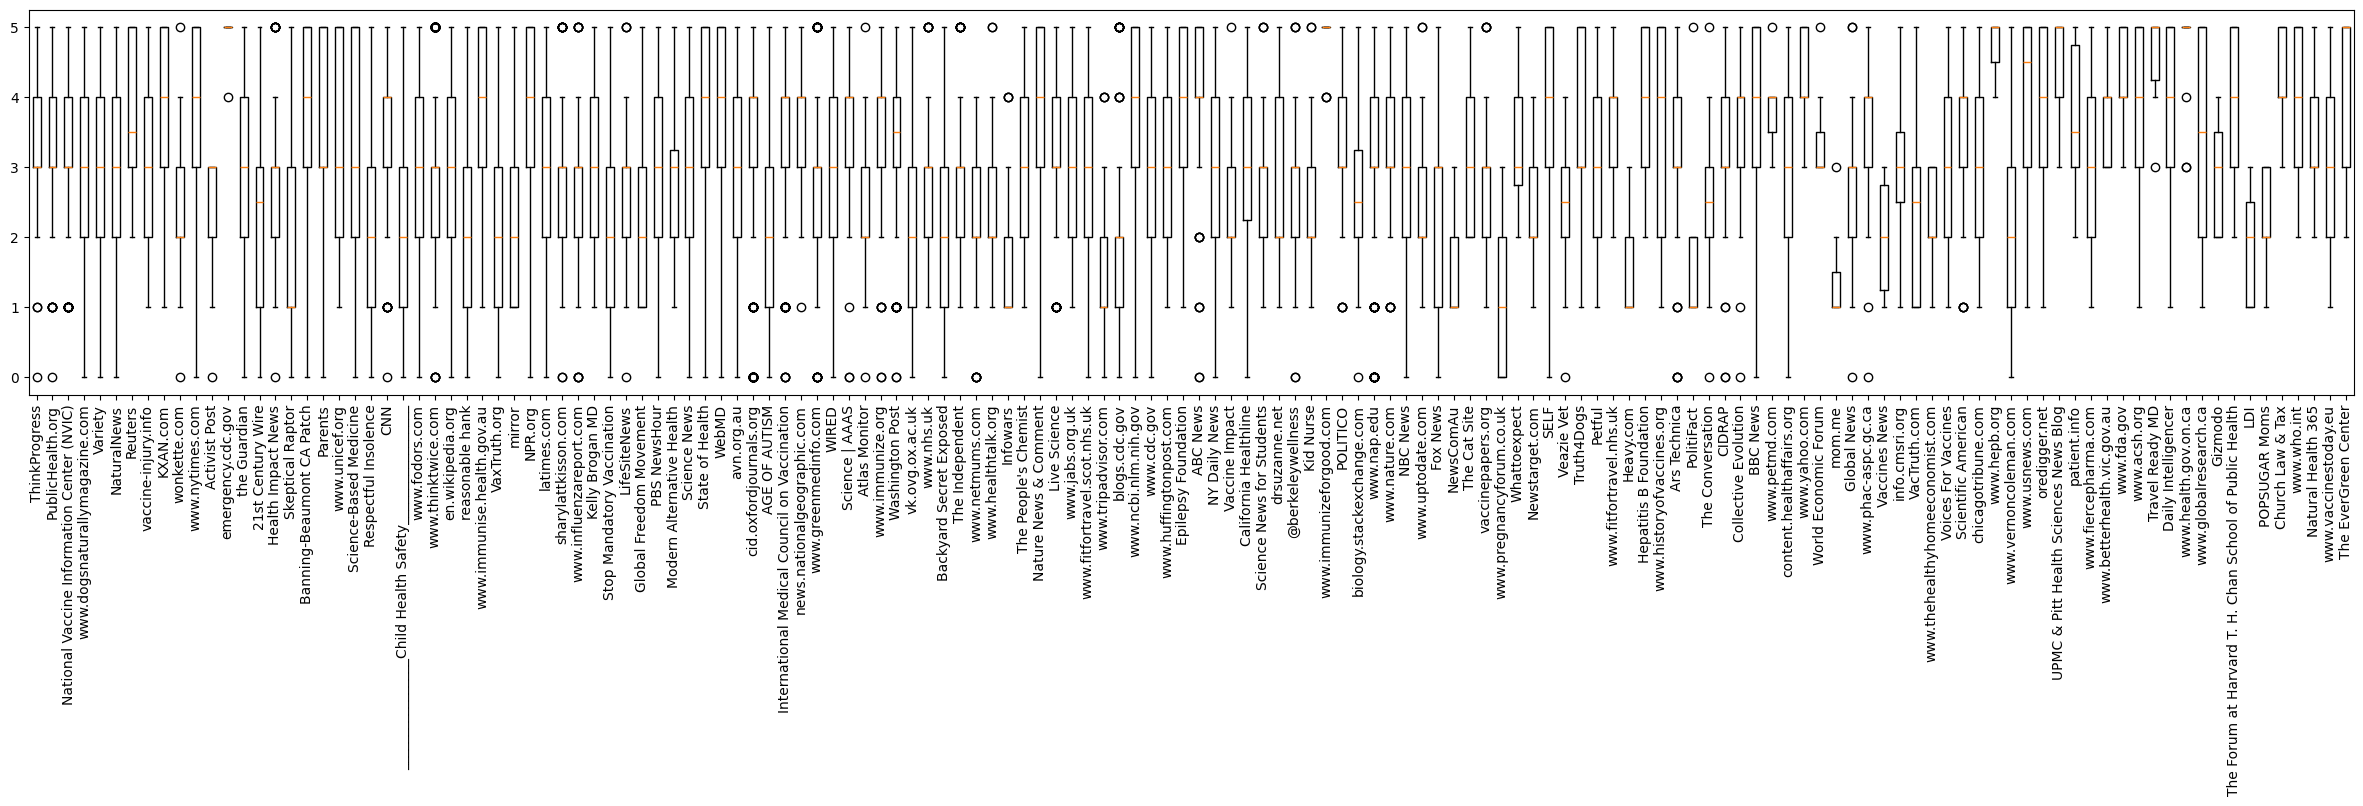

--------------------------------------------------------------------------------



In [108]:
@print_formatting
def scores_per_publisher(df: pd.DataFrame, colname: str) -> None:
    """Prints the scores in `colname` per publisher"""

    unique_publishers = df[colname].unique()    

    print('The mean reliability score per publisher is:')
    print(df.groupby('publisher')['score'].mean().to_string().lstrip('publisher'))
    print()

    # overview boxplots
    plt.figure(figsize=(30, 5))
    plt.boxplot([df[df['publisher']==publisher]['score'] for publisher in unique_publishers], labels=unique_publishers)
    plt.xticks(rotation=90)
    plt.show()
    
    # uncomment for boxplots per publisher
    # for publisher in df["publisher"].unique():
    #     df[df["publisher"] == publisher].boxplot(column="score")
    #     plt.title(f"{publisher} (support: {df[df['publisher'] == publisher]['score'].count()})")
    #     plt.show()

scores_per_publisher(df, 'score')

------------------------------ score_per_worker() ------------------------------
              """Prints the mean scores in `colname` per worker"""              

Average reliability score per worker: 2.9448554913294798
Average score per worker:
                  mean  support
worker_id                      
23QWQCPZ7PNP  5.000000        1
2AZWNZRTVACE  2.872727      110
2GKTZAGQYCN4  3.027068      665
2KJAY9AMYRCD  2.390681      279
2ME4D2R27FJK  3.088235      102
2VHW4RE6AKTN  2.400000       15
32MTNCTCCVR6  3.285714       49
36DRXJNMPXGF  2.571705      516
3GM49GZGVH4A  3.458333       24
3HDZDWXPEQAE  2.400000        5
3MEG6THYHV69  3.133333       15
4ACJA6QTDYMG  2.398667      750
4QHKZTW26XFW  3.493506      308
4REVNE2CDF7H  2.936170       47
4TNHZX6VKQAA  3.000000       13
64AFFXCKWR7N  3.296124      645
67HP3WRN63ZJ  3.062500       16
6CNHTCG6W6XM  2.969925      266
72TDDMF6WWVT  2.581356      590
76VNAHQ9VAC3  3.333333       15
7R2NKCJQNXPP  3.060268      448
7YG43VN77NW3  2.68

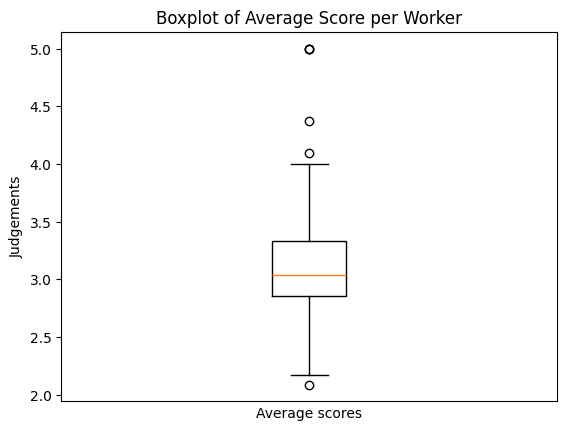

--------------------------------------------------------------------------------



In [136]:
@print_formatting
def score_per_worker(df: pd.DataFrame, colname: str) -> None:
    """Prints the mean scores in `colname` per worker"""
    
    # compute overall average
    print(f'Average reliability score per worker: {df[colname].mean()}')

    # compute average per worker
    scores = pd.merge(df.groupby('worker_id')[colname].mean(), df.groupby('worker_id')[colname].count(), how='inner', on='worker_id')
    scores.rename(columns={'score_x': 'mean', 'score_y': 'support'}, inplace=True)
    print(f'Average {colname} per worker:\n{scores.to_string()}')

    # boxplot of averages per worker
    plt.boxplot(df.groupby('worker_id')[colname].mean())
    plt.title(f'Boxplot of Average {colname.capitalize()} per Worker')
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.ylabel('Judgements')
    plt.xlabel(f'Average {colname}s')
    plt.show()

score_per_worker(df, 'score')

------------------------ count_judgements_per_worker() -------------------------
                 """Prints the number of judgements per user"""                 

Average amount of judgements per worker: 161.682


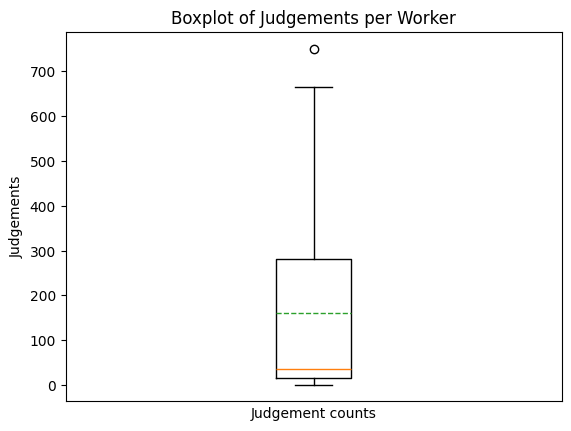

--------------------------------------------------------------------------------



In [142]:
@print_formatting
def count_judgements_per_worker(df: pd.DataFrame) -> None:
    """Prints the number of judgements per user"""

    # average number of judgements per user
    judgements_per_user = df['worker_id'].value_counts()
    print(f'Average amount of judgements per worker: {judgements_per_user.mean():.3f}')

    # boxplot of judgements per user
    plt.boxplot(judgements_per_user, showmeans=True, meanline=True)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.title('Boxplot of Judgements per Worker')
    plt.ylabel('Judgements')
    plt.xlabel('Judgement counts')
    plt.show()

count_judgements_per_worker(df)

## Z-score data and run some visualizations/statistics again

In [111]:
from scipy.stats import zscore

df['z_score'] = zscore(df['score'])
df.head()

,worker_id,task_id,task_response_id,file_id,sentence,tokens_id,publisher,source,reliability,Optional Comments:,batch_no,score,z_score
0,23QWQCPZ7PNP,f79dff90-7723-4c33-9582-33e46ab6176c,15d3b8d0-d17f-49b2-bb2f-c113957cddf7,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5,1.560975
1,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3,0.041885
2,9R3XRNAAW7RR,f040bde3-4c11-482c-b7e3-4bd080b1a7f7,2c7856c7-0bc6-4f40-9781-37b6942a2e36,PublicHealth-org_20170623T200727.conll.annot,14,1 2,PublicHealth.org,The article,5 - The source is fully reliable,NaN,1,5,1.560975
3,MWHG9Y6DNGR9,f79dff90-7723-4c33-9582-33e46ab6176c,e2b709b8-16f3-4bc4-b513-8c2f28f0f1e1,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5,1.560975
4,D7HVJTEKMYNW,e3f62e34-fb40-4bda-a5b4-acd3d72c1160,f16d6d05-ab57-4117-85b5-8c87fcd5a689,National-Vaccine-Information-Center-(NVIC)_201...,26,5 6,National Vaccine Information Center (NVIC),Dr. Cherry,5 - The source is fully reliable,NaN,1,5,1.560975


---------------------- reliability_scores_distribution() -----------------------
     """Prints the distribution of the (reliability) scores in a column"""      

z_score
-2.2368     360
-1.4772    2487
-0.7177    3306
 0.0419    5311
 0.8014    3266
 1.5610    2570
Name: count, dtype: int64
--------------------------------------------------------------------------------



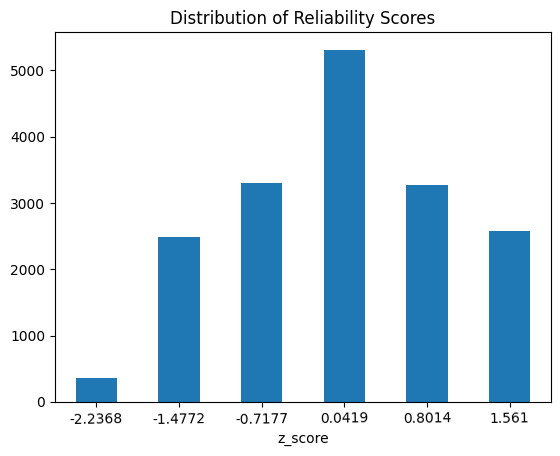

In [140]:
reliability_scores_distribution(df['z_score'].round(4))

------------------------------ score_per_worker() ------------------------------
              """Prints the mean scores in `colname` per worker"""              

Average reliability score per worker: -9.857240264880002e-18
Average z_score per worker:
              z_score_x  z_score_y
worker_id                         
23QWQCPZ7PNP   1.560975          1
2AZWNZRTVACE  -0.054785        110
2GKTZAGQYCN4   0.062444        665
2KJAY9AMYRCD  -0.420921        279
2ME4D2R27FJK   0.108903        102
2VHW4RE6AKTN  -0.413842         15
32MTNCTCCVR6   0.258898         49
36DRXJNMPXGF  -0.283424        516
3GM49GZGVH4A   0.390010         24
3HDZDWXPEQAE  -0.413842          5
3MEG6THYHV69   0.143157         15
4ACJA6QTDYMG  -0.414855        750
4QHKZTW26XFW   0.416725        308
4REVNE2CDF7H  -0.006597         47
4TNHZX6VKQAA   0.041885         13
64AFFXCKWR7N   0.266804        645
67HP3WRN63ZJ   0.089356         16
6CNHTCG6W6XM   0.019041        266
72TDDMF6WWVT  -0.276094        590
76VNAHQ9VAC3 

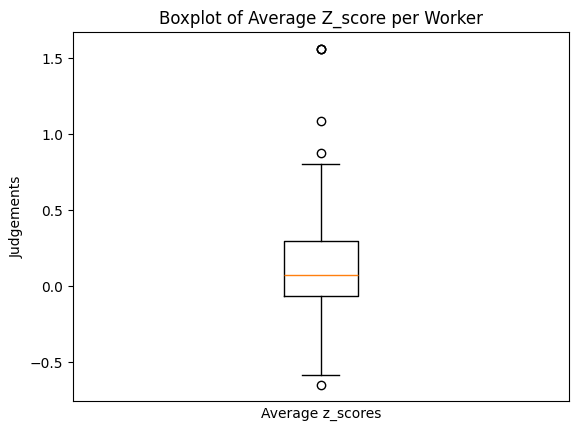

--------------------------------------------------------------------------------



In [141]:
score_per_worker(df, 'z_score')

--------------------- reliability_z_scores_per_publisher() ---------------------
               """Prints the reliability scores per publisher"""                

There are 146 unique publishers in the dataset.

The mean reliability score per publisher is:

21st Century Wire                                         -0.303839
@berkeleywellness                                         -0.307747
ABC News                                                   0.801430
AGE OF AUTISM                                             -0.717661
Activist Post                                             -0.538944
Ars Technica                                               0.191081
Atlas Monitor                                             -0.500648
BBC News                                                   0.611544
Backyard Secret Exposed                                   -0.489226
Banning-Beaumont CA Patch                                  0.759543
CIDRAP                                                     0.1

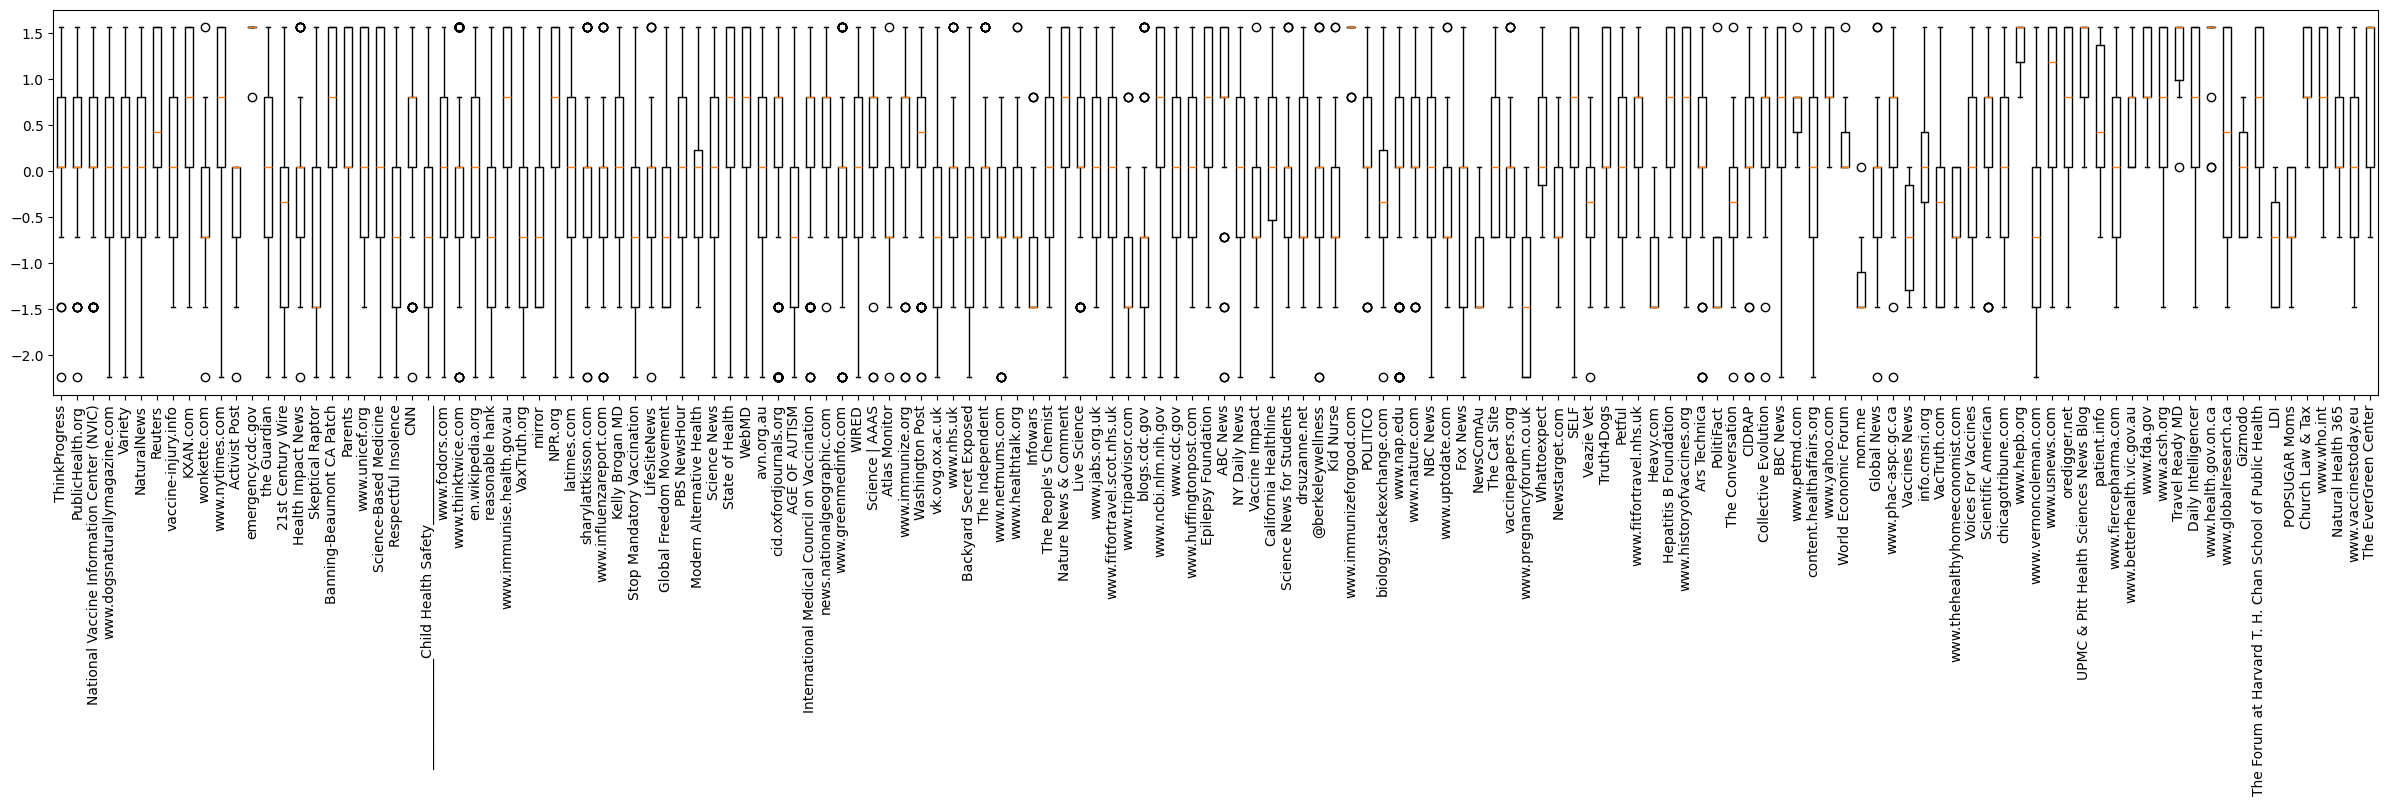

--------------------------------------------------------------------------------



In [16]:
@print_formatting
def reliability_z_scores_per_publisher(df: pd.DataFrame) -> None:
    """Prints the reliability scores per publisher"""

    unique_publishers = df["publisher"].unique()    

    print(f"There are {len(unique_publishers)} unique publishers in the dataset.\n")

    print("The mean reliability score per publisher is:")
    print(df.groupby("publisher")["z_score"].mean().to_string().lstrip('publisher'))
    print()

    # overview boxplots
    plt.figure(figsize=(30, 5))
    plt.boxplot([df[df["publisher"]==publisher]['z_score'] for publisher in unique_publishers], labels=unique_publishers, )
    plt.xticks(rotation=90)
    plt.show()
    
    # boxplots per publisher (detailed)
    # for publisher in df["publisher"].unique():
    #     df[df["publisher"] == publisher].boxplot(column="score")
    #     plt.title(f"{publisher} (support: {df[df['publisher'] == publisher]['score'].count()})")
    #     plt.show()

    

reliability_z_scores_per_publisher(df)

## Try running more clustering 

In [17]:
from numpy import ndarray
def create_z_matrix(
    workers: ndarray, tasks: ndarray, judgements: pd.DataFrame
) -> pd.DataFrame:
    """Create a matrix where the rows are the users and the columns are the judgements."""

    matrix = pd.DataFrame(index=list(workers), columns=list(tasks))

    for judgement in tqdm(judgements.itertuples(), total=len(judgements), leave=False):
        if judgement.z_score != None:
            matrix.loc[judgement.worker_id, judgement.task_id] = judgement.z_score

    # fill in the empty values with -1
    matrix = matrix.fillna(-1)

    return matrix

  0%|          | 0/17300 [00:00<?, ?it/s]

/tmp/ipykernel_375939/3742636435.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matrix = matrix.fillna(-1)


Text(0.5, 1.0, 'Elbow curve')

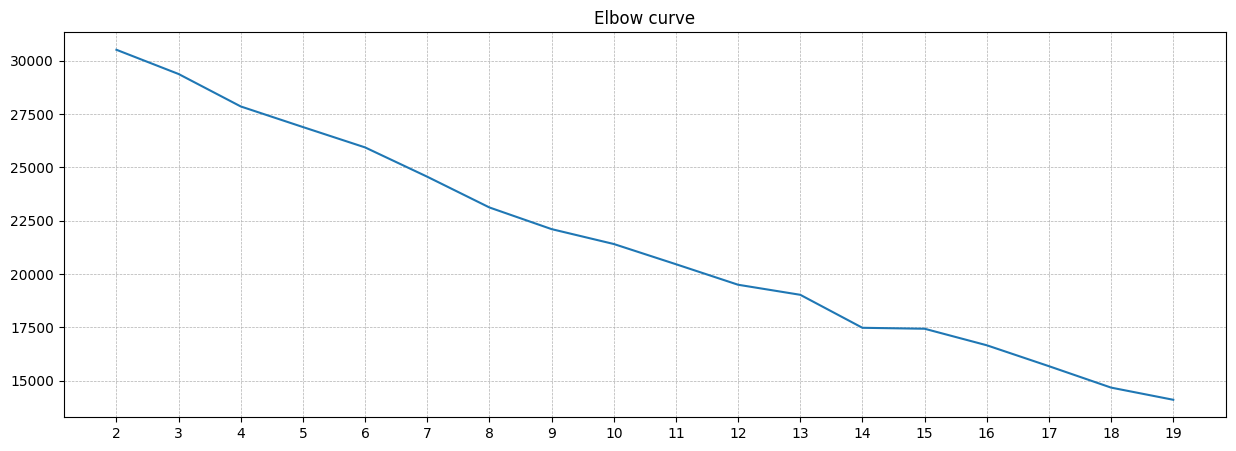

In [18]:
z_matrix = create_z_matrix(df['worker_id'].unique(), df['task_id'].unique(), df)
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=123, n_init=10)
    kmeans.fit(z_matrix)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Elbow curve')

<Axes: title={'center': 'score'}, xlabel='category'>

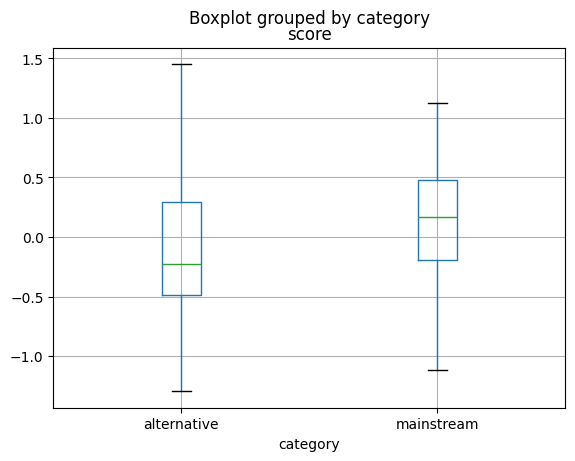

In [19]:
from statistical_tests import load_data

stats_df = load_data("./data/publisher_annotations.csv", "./data/claimant_data/")

# filter df on only mainstream and alternative sources
df_filtered = stats_df[
    (stats_df["category"] == "mainstream") | (stats_df["category"] == "alternative")
]

# create boxplot per category
df_filtered.boxplot(column="score", by="category")

## Zero-scores

There are 2200 tasks that did not receive zero scores, and 250 tasks that did receive zero scores.
See the distribution of zero scores below:


<Axes: >

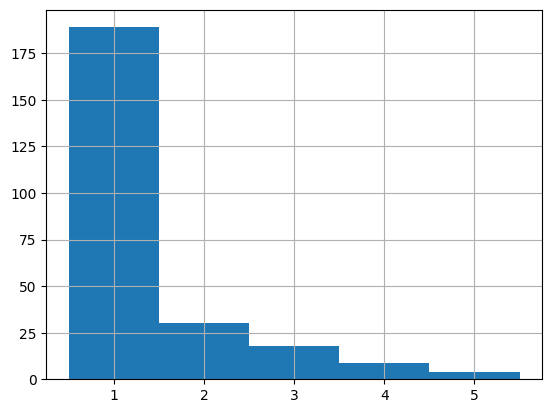

In [58]:
# make histogram of tasks scored with 0

zero_scores = []
for task_id in df['task_id'].unique():
    zero_scores.append(df[df['task_id'] == task_id]['score'].value_counts().get(0))
    # print(task_id, zero_scores)

zero_scores_series = pd.Series(zero_scores)

print(f'There are {zero_scores_series.isnull().sum()} tasks that did not receive zero scores, and {zero_scores_series.count()} tasks that did receive zero scores.')
print('See the distribution of zero scores below:')

# make histogram of tasks scored with 0
zero_scores_series.hist(bins=5, align='left')

In [61]:
# count how many annotators used 0 to score a task

workers_with_zero_score = 0
for worker_id in df['worker_id'].unique():
    if 0 in df[df['worker_id'] == worker_id]['score'].values:
        workers_with_zero_score += 1
        
print(f'{workers_with_zero_score} workers used 0 to score at least one task, and {len(df["worker_id"].unique()) - workers_with_zero_score} workers did not.')


47 workers used 0 to score at least one task, and 60 workers did not.
